<a href="https://colab.research.google.com/github/giedriusblazys/SDA_DS_class/blob/main/Computer_Vision_20210530_cv_day_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuration

In [ ]:

from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
!ls -la '/content/drive/My Drive/Colab Notebooks/'

total 8902
-rw------- 1 root root  401802 Dec 19 06:21  01_Pandas.ipynb
-rw------- 1 root root   74481 Jan 15 14:18  05_API.ipynb
-rw------- 1 root root  200820 Apr  9 10:29  DNN_01.ipynb
-rw------- 1 root root   23821 Mar 17 06:52 'Kopia notatnika Kopia notatnika Pipeline Experiment.ipynb'
-rw------- 1 root root  573616 Jan 16 13:10 'Kopia notatnika Kopia notatnika wizualizacja_danych_zddatapol18.ipynb'
-rw------- 1 root root   29877 Mar 17 06:53 'Kopia notatnika Pipeline Experiment.ipynb'
-rw------- 1 root root  573526 Jan 16 13:11 'Kopia notatnika wizualizacja_danych_zddatapol18.ipynb'
-rw------- 1 root root 1023149 Jan 22 12:46 'Kopia notatnika zddatapol18_wizualizacja_danych_dzien2 (1).ipynb'
-rw------- 1 root root 4248800 Jan 24 05:35 'Kopia notatnika zddatapol18_wizualizacja_danych_dzien2.ipynb'
-rw------- 1 root root   90999 Dec 27 12:55  mc_mój.ipynb
-rw------- 1 root root   48142 Dec 13 17:53  numerical_python______stats.ipynb
-rw------- 1 root root   41376 Dec 14 06:25  num

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

img = cv2.imread('/content/drive/My Drive/Colab Notebooks/test.png')
cv2_imshow(img)

AttributeError: ignored

# Filtry

In [ ]:
#Filters

import numpy as np

def apply_filter(source, kernel):
  new_image = cv2.filter2D(source, -1, kernel)
  cv2_imshow(new_image)
  return new_image


#idendity
idendity_kernel = np.array([[0, 0, 0],
                            [0, 1, 0],
                            [0, 0, 0]])
apply_filter(img, idendity_kernel)

#blur
blur_kernel = np.ones((3, 3), np.float32) / 9
apply_filter(img, blur_kernel)

#sharpen
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

apply_filter(img, sharpen_kernel)

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#simply_edge_detection
simply_edge_kernel = np.array([[-1, -1, -1],
                               [-1, 8, -1],
                               [-1, -1, -1]])

apply_filter(gray_img, simply_edge_kernel)

#bottom sobel
bottom_sobel_kernel = np.array([[-1, -2, -1],
                                [0, 0, 0],
                                [1, 2, 1]])

bottom_sobel = apply_filter(gray_img, bottom_sobel_kernel)

#bottom sobel
left_sobel_kernel = np.array([[1, 0, -1],
                              [2, 0, -2],
                              [1, 0, -1]])

left_sobel = apply_filter(gray_img, left_sobel_kernel)


#sobel
sobel = left_sobel/2 + bottom_sobel/2
cv2_imshow(sobel)



# Histogram Equalization

In [ ]:
import matplotlib.pyplot as plt

def show_histogram(image):
  ax1 = plt.subplot(331)
  plt.xlim([0, 256])
  plt.ylim([0, 4000])
  for i, col in enumerate(['b', 'g', 'r']):

      hist = cv2.calcHist([image], [i], None, [256], [0, 256])
      ax1 = plt.subplot(3,1,i+1, sharey=ax1)
      plt.plot(hist, color = col)
      
      if i<2:
        plt.setp(ax1.get_xticklabels(), visible=False)

  plt.show()

show_histogram(img)

In [ ]:
def show_hsv_equalized(image):
    new_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    H, S, V = cv2.split(new_image)
    eq_H = cv2.equalizeHist(H)
    eq_S = cv2.equalizeHist(S)
    eq_V = cv2.equalizeHist(V)
    eq_image = cv2.cvtColor(cv2.merge([H, eq_S, eq_V]), cv2.COLOR_HSV2BGR)
    cv2_imshow(eq_image)
    show_histogram(eq_image)

show_hsv_equalized(img)

# Progression

In [ ]:
def threshold(image):
  @interact(x=widgets.IntSlider(min=0, max=255, step=1, value=100))
  def trackbar(x):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _,thresh1 = cv2.threshold(gray_img,x,255,cv2.THRESH_BINARY)
    cv2_imshow(thresh1)
  
threshold(img)

In [ ]:
def adaptive_threshold(image):
  @interact(x=widgets.IntSlider(min=3, max=15, step=2, value=9), y=True)
  def trackbar(x, y):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    if y:
      adaptive_method = cv2.ADAPTIVE_THRESH_MEAN_C
    else:
      adaptive_method = cv2.ADAPTIVE_THRESH_GAUSSIAN_C

    result = cv2.adaptiveThreshold(gray_img,255,adaptive_method, 
                                      cv2.THRESH_BINARY,x,2)
    cv2_imshow(result)
  
  
adaptive_threshold(img)

# Morphological operation

In [ ]:
def morphological_operation(image):

  def opening(img, kernel):
    return cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
  
  def closing(img, kernel):
    return cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

  @interact(operation=['Erosion','Dilation', 'Opening', 'Closing'], 
            struct_el=['MORPH_RECT','MORPH_ELLIPSE', 'MORPH_CROSS'], 
            size = widgets.IntSlider(min=3, max=15, step=2, value=5))
  def trackbar(operation, struct_el, size):
    operation_dict = {'Erosion': cv2.erode,'Dilation': cv2.dilate,
                      'Opening': opening, 'Closing': closing}
    struct_el_dict = {'MORPH_RECT': cv2.getStructuringElement(cv2.MORPH_RECT,(size, size)),
                      'MORPH_ELLIPSE': cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(size, size)),
                      'MORPH_CROSS': cv2.getStructuringElement(cv2.MORPH_CROSS,(size, size))}
    result = operation_dict[operation](image, struct_el_dict[struct_el])
    cv2_imshow(result)
  

#using sobel output form above
sobel[sobel>30] = 255
cv2_imshow(sobel)
morphological_operation(sobel)


# Feature Extraction

In [ ]:
import numpy as np
shapes = cv2.imread('/content/drive/My Drive/Colab Notebooks/contours.png')

gray_shapes = cv2.cvtColor(shapes, cv2.COLOR_BGR2GRAY)
_,thresh1 = cv2.threshold(gray_shapes,50,255,cv2.THRESH_BINARY)
cv2_imshow(thresh1)

NameError: ignored

In [ ]:
contours, hierarchy	=	cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_with_contours = cv2.drawContours(shapes, contours, -1, (255,0,0), 3)
cv2_imshow(img_with_contours)
print(hierarchy)

In [ ]:
# Get rid of internal contours, extract information about childs

filtered_contours = []
has_a_child = []

for contour, h in zip(contours, hierarchy[0]):
  if h[3] == -1:
    filtered_contours.append(contour)
    if h[2] != -1:
      has_a_child.append(1)
    else:
      has_a_child.append(0)

print(has_a_child)

In [ ]:
# Get all usefull information from contours
features_list = []

for contour, childs in zip(filtered_contours, has_a_child):
  print(contour)
  moments = cv2.moments(contour)
  hu_moments = cv2.HuMoments(moments)
  
  contour_area = cv2.contourArea(contour)
  arc_length = cv2.arcLength(contour, True)
  if arc_length > 0:
    features = {x: hu[0] for x, hu in enumerate(hu_moments)}
    features['circularity'] = 4 * 3.14 * contour_area / arc_length**2
    features['has_child'] = childs
    features_list.append(features)

In [ ]:
# Save data as pd.DataFrame
import pandas as pd

pd.options.display.float_format = "{:,.2f}".format
df = pd.DataFrame(features_list)
df

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

from sklearn import preprocessing

x = df.values #returns a numpy array
normalizer = preprocessing.Normalizer()
x_scaled = normalizer.fit_transform(x)
df = pd.DataFrame(x_scaled)

kmeans = KMeans(n_clusters=6, random_state=0).fit(df)
print(kmeans.labels_)

colors = [(255,0,0), (255,255,0), (255,0,255), (0,255,0), (0,255,255), (0,0,255)]
for contour, label in zip(filtered_contours, kmeans.labels_):
  classified = cv2.drawContours(shapes, [contour], 0, colors[label], 3)
  
print(df)
cv2_imshow(classified)


# Sesja samodzielna

**MNIST**

Zbiór danych MNIST to akronim oznaczający zbiór danych Modified National Institute of Standards and Technology.

Jest to zbiór danych zawierający 60000 małych kwadratowych obrazów 28 × 28 pikseli w skali szarości, składających się z odręcznych pojedynczych cyfr od 0 do 9.

Zadanie polega na zaklasyfikowaniu danego obrazu odręcznej cyfry do jednej z 10 klas reprezentujących wartości całkowite od 0 do 9 włącznie.

Jest to powszechnie używany i głęboko rozumiany zbiór danych, który w większości jest „rozwiązany”. Modele o najwyższej wydajności to splotowe sieci neuronowe do głębokiego uczenia, które osiągają dokładność klasyfikacji powyżej 99%, przy współczynniku błędów między 0,4% a 0,2% w przypadku zestawu danych testowych.

**Zadanie**

Z wykorzystaniem konwencjonalnych metod, stwórz pipeline wydobywający cechy z obrazu i na ich podstawie spróbuj rozwiązać to zadanie.


1.   Załaduj bazę obrazów do pamieci
2.   Wyświetl kilka przykładowych obrazów, żeby zapoznać się z MNISTem
3.   Stwórz funkcję pobierającą informację o odpowiednim konturze z obrazka
4.   Stwórz funkcję pobierającą featury z konturu
5.   Przedstaw dane w postaci dataframów (nie zapomnij - zarówno dla obrazów testowych i treningowych)
6.   Znormalizuj dane!
7.   Klasyfikacja! Wyniki przedstaw w raporcie


# Zbiór odpowiedzi

1.   Załaduj bazę obrazów do pamieci




In [ ]:
from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()

print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

11501568/11490434 [==============================] - 0s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


2.   Wyświetl kilka przykładowych obrazów, żeby zapoznać się z MNISTem


In [ ]:
# from matplotlib import pyplot

# for i in range(9):  
#   pyplot.subplot(330 + 1 + i)
#   pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('copper'))
#   pyplot.show()


3.   Stwórz funkcję pobierającą informację o odpowiednim konturze z obrazka


In [ ]:
import pandas as pd

def get_contour(image):
  _,thresh1 = cv2.threshold(image,50,255,cv2.THRESH_BINARY)

  contours, hierarchy	=	cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  filtered_contours = []
  childs_list = []
  for contour, h in zip(contours, hierarchy[0]):
    if h[3] == -1:
      return contour, len(contours)-1

4.   Stwórz funkcję pobierającą featury z konturu

In [ ]:
def get_fetures(cnt, childs):

  moments = cv2.moments(cnt)
  hu_moments = cv2.HuMoments(moments)
  features = {x: hu[0] for x, hu in enumerate(hu_moments)}
  contour_area = cv2.contourArea(cnt)
  arc_length = cv2.arcLength(cnt, True)
  try:
    features['circularity'] = 4 * 3.14 * contour_area / arc_length**2
  except ZeroDivisionError:
    features['circularity'] = 0
  features['childs'] = childs
  
  return features

5.   Przedstaw dane w postaci dataframów (nie zapomnij - zarówno dla obrazów testowych i treningowych)

In [ ]:
# train data

lst_features = []
for image in train_X:  
  contour, childs = get_contour(image)
  lst_features.append(get_fetures(contour, childs))

pd.options.display.float_format = "{:,.2f}".format
df_train = pd.DataFrame(lst_features)
df_train

# test data

lst_features = []
for image in test_X:  
  contour, childs = get_contour(image)
  lst_features.append(get_fetures(contour, childs))

pd.options.display.float_format = "{:,.2f}".format
df_test = pd.DataFrame(lst_features)
df_test


NameError: ignored

6.   Znormalizuj dane!

In [ ]:
#Normalization
from sklearn import preprocessing

def normalize(data):
  x = data.values #returns a numpy array
  normalizer = preprocessing.Normalizer()
  x_scaled = normalizer.fit_transform(x)
  data = pd.DataFrame(x_scaled)
  return data

df_test = normalize(df_test)
df_train = normalize(df_train)

7.   Klasyfikacja! Wyniki przedstaw w raporcie

In [ ]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(df_train, train_y)
prediction = clf.predict(df_test)
print(classification_report(test_y, prediction))

In [ ]:
from imgaug import augmenters as iaa
ia.seed(4)
images = [image, image, image, image]
rotate = iaa.Affine(rotate=(-25, 25))
image_aug = rotate(images=images)
print("Augmented:")
ia.imshow(np.hstack(image_aug))

In [ ]:
import cv2

11501568/11490434 [==============================] - 0s 0us/step
Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 7')

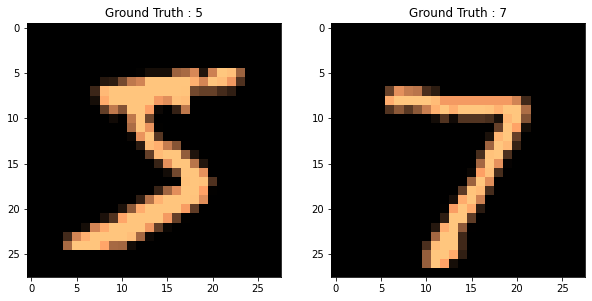

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
import keras

(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
print('Training data shape : ', train_x.shape, train_y.shape) 
print('Testing data shape : ', test_x.shape, test_y.shape)
# Find the unique numbers from the train labels
classes = np.unique(train_y)
classes_num = len(classes)
print('Total number of outputs : ', classes_num) 
print('Output classes : ', classes)
plt.figure(figsize=[10,5])
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_x[0,:,:], cmap='copper') 
plt.title("Ground Truth : {}".format(train_y[0]))
# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_x[0,:,:], cmap='copper') 
plt.title("Ground Truth : {}".format(test_y[0]))
plt.title("Ground Truth : {}".format(test_y[0]))

In [ ]:
 # Change from matrix to array of dimension 28x28 to array of dimension 784
train_x = train_x.reshape(train_x.shape[0], -1) 
test_x = test_x.reshape(test_x.shape[0], -1)
# 0-255 to 0-1
train_x = train_x/255 
test_x = test_x/255
# Change the labels from integer to categorical data
train_y_one_hot = to_categorical(train_y) 
test_y_one_hot = to_categorical(test_y)

In [ ]:
 # Make a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(train_x.shape[1],)))
model.add(Dense(512, activation='relu'))
model.add(Dense(classes_num, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_x, train_y_one_hot,
                   batch_size=256, epochs=10, verbose=True,
                   validation_data=(test_x, test_y_one_hot))
[test_loss, test_acc] = model.evaluate(test_x, test_y_one_hot)
print(f"Evaluation result on Test Data : Loss = {test_loss}, accuracy = {test_acc}")

Epoch 1/10
235/235 [==============================] - 10s 12ms/step - loss: 0.2672 - accuracy: 0.9177 - val_loss: 0.1244 - val_accuracy: 0.9608
Epoch 2/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0918 - accuracy: 0.9715 - val_loss: 0.0738 - val_accuracy: 0.9769
Epoch 3/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0594 - accuracy: 0.9812 - val_loss: 0.0897 - val_accuracy: 0.9725
Epoch 4/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0403 - accuracy: 0.9873 - val_loss: 0.0700 - val_accuracy: 0.9804
Epoch 5/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0289 - accuracy: 0.9909 - val_loss: 0.0772 - val_accuracy: 0.9802
Epoch 6/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0206 - accuracy: 0.9934 - val_loss: 0.0705 - val_accuracy: 0.9815
Epoch 7/10
235/235 [==============================] - 2s 6ms/step - loss: 0.0174 - accuracy: 0.9945 - val_loss: 0.0778 - val_accuracy: 0.9809
Epoc

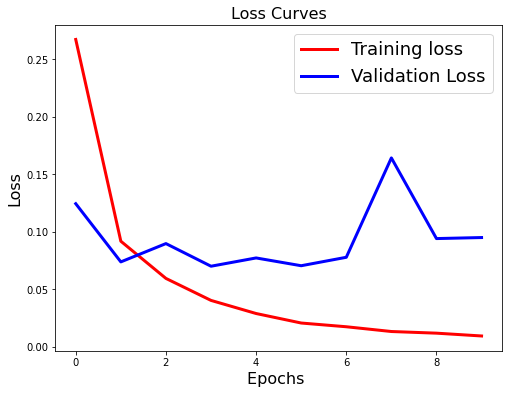

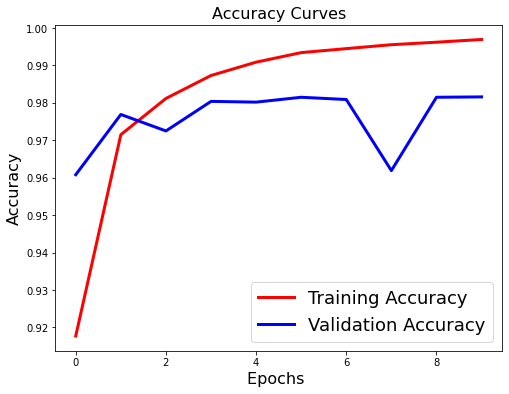

In [ ]:
def plot_history(history):
 #Plot the Loss Curves
 plt.figure(figsize=[8,6])
 plt.plot(history.history['loss'],'r',linewidth=3.0)
 plt.plot(history.history['val_loss'],'b',linewidth=3.0)
 plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
 plt.xlabel('Epochs ',fontsize=16)
 plt.ylabel('Loss',fontsize=16)
 plt.title('Loss Curves',fontsize=16)
 #Plot the Accuracy Curves
 plt.figure(figsize=[8,6])
 plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
 plt.plot(history.history['val_accuracy'], 'b',linewidth=3.0)
 plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
 plt.xlabel('Epochs ',fontsize=16)
 plt.ylabel('Accuracy',fontsize=16)
 plt.title('Accuracy Curves',fontsize=16)
plot_history(history)

In [ ]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data () # 0-255 to 0-1
train_x = train_x/ 255
test_x = test_x/ 255
# Change the labels from integer to categorical data
train_y_one_hot = to_categorical (train_y) 
test_y_one_hot = to_categorical (test_y)

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
import tensorflow

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu',
kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu',
kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu',
kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu',
kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',
kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = tensorflow.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy',
metrics=['accuracy'])
# fit model
history = model.fit(train_x, train_y_one_hot, epochs=30, batch_size=64, validation_data=(test_x, test_y_one_hot), verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/30
782/782 [==============================] - 27s 23ms/step - loss: 1.7639 - accuracy: 0.3609 - val_loss: 1.6051 - val_accuracy: 0.4416
Epoch 2/30
782/782 [==============================] - 17s 22ms/step - loss: 1.4121 - accuracy: 0.4922 - val_loss: 1.3599 - val_accuracy: 0.5083
Epoch 3/30
782/782 [==============================] - 17s 22ms/step - loss: 1.2392 - accuracy: 0.5602 - val_loss: 1.1861 - val_accuracy: 0.5780
Epoch 4/30
782/782 [==============================] - 18s 24ms/step - loss: 1.1082 - accuracy: 0.6073 - val_loss: 1.0951 - val_accuracy: 0.6084
Epoch 5/30
782/782 [==============================] - 17s 22ms/step - loss: 1.0023 - accuracy: 0.6464 - val_loss: 1.0616 - val_accuracy: 0.6309
Epoch 6/30
782/782 [==============================] - 17s 22ms/step - loss: 0.9081 - accuracy: 0.6811 - val_loss: 1.0305 - val_accuracy: 0.6389
Epoch 7/30
782/782 [==============================] - 17s 22ms/step - loss: 0.8384 - accuracy: 0.7069 - val_loss: 0.9646 - val_accuracy:

In [ ]:
from tensorflow.keras.layers import BatchNormalization, Dropout

model = Sequential ()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer= 'he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add (BatchNormalization ())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer= 'he_uniform', padding='same'))
model.add (BatchNormalization ())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer= 'he_uniform', padding='same'))
model.add (BatchNormalization ())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer= 'he_uniform', padding='same'))
model.add (BatchNormalization ())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer= 'he_uniform', padding='same'))
model.add (BatchNormalization ())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer= 'he_uniform', padding='same'))
model.add (BatchNormalization ())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer= 'he_uniform')) 
model.add (BatchNormalization ())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# compile model
opt = tensorflow.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy',
metrics=['accuracy'])
# fit model
history = model.fit(train_x, train_y_one_hot, epochs=30, batch_size=64, validation_data=(test_x, test_y_one_hot), verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/30
782/782 [==============================] - 24s 27ms/step - loss: 2.0730 - accuracy: 0.3151 - val_loss: 1.5501 - val_accuracy: 0.4400
Epoch 2/30
782/782 [==============================] - 21s 26ms/step - loss: 1.5377 - accuracy: 0.4423 - val_loss: 1.4303 - val_accuracy: 0.4662
Epoch 3/30
782/782 [==============================] - 21s 27ms/step - loss: 1.3964 - accuracy: 0.4929 - val_loss: 1.3112 - val_accuracy: 0.5203
Epoch 4/30
782/782 [==============================] - 21s 27ms/step - loss: 1.3025 - accuracy: 0.5283 - val_loss: 1.2574 - val_accuracy: 0.5404
Epoch 5/30
782/782 [==============================] - 21s 26ms/step - loss: 1.2341 - accuracy: 0.5579 - val_loss: 1.2212 - val_accuracy: 0.5571
Epoch 6/30
782/782 [==============================] - 20s 26ms/step - loss: 1.1683 - accuracy: 0.5792 - val_loss: 1.1285 - val_accuracy: 0.5979
Epoch 7/30
782/782 [==============================] - 20s 26ms/step - loss: 1.1226 - accuracy: 0.6011 - val_loss: 1.0971 - val_accuracy:

In [ ]:
from keras.models import Model
from tensorflow.keras.applications import MobileNetV2

(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data () # 0-255 to 0-1
train_x = train_x/ 255
test_x = test_x/ 255
# Change the labels from integer to categorical data
train_y_one_hot = to_categorical (train_y) 
test_y_one_hot = to_categorical (test_y)
model = MobileNetV2 (input_shape= (train_x.shape [1], train_x.shape [2], 3), classes= 10, include_top=False, weights=None)
x=model.layers [-1].output
x=keras.layers.BatchNormalization (axis=-1, momentum=0.99, epsilon=0.001 )(x) 
flatten=Flatten ()(x)
predictions=Dense(10, activation='softmax')(flatten)
model = Model (inputs=model.input , outputs=predictions )
# compile model
opt = tensorflow.keras.optimizers.SGD (lr=0.001, momentum=0.9) 
model.compile(optimizer=opt, loss='categorical_crossentropy' ,metrics= ['accuracy' ])
# fit model
history = model.fit(train_x, train_y_one_hot, epochs=30, batch_size=64, validation_data= (test_x, test_y_one_hot), verbose=1)
# evaluate model
_, acc = model.evaluate(test_x, test_y_one_hot, verbose=1)